In [1]:
import pandas as pd

In [2]:
d1={'LotFrontage':['NA',''],'MasVnrArea':'NA','MasVnrType':'NA','Electrical':'NA','GarageYrBlt':'NA'}   #in some columns NA is missing but in some NA is treated as no value So in dictionary we give NA as missing value
df_train=pd.read_csv('../../../Datasets/house-prices-advanced-regression-techniques/train.csv',keep_default_na=False,na_values=d1)


In [3]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.isna().sum()[:10]   #column sum of NA values

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
dtype: int64

## Check for outliers

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

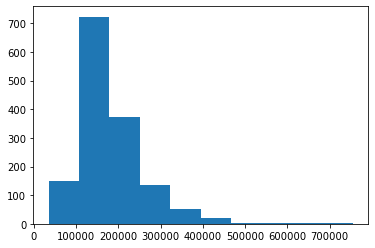

In [6]:
import matplotlib.pyplot as plt
plt.hist(df_train['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14ee13cc670>,
 'caps': [<matplotlib.lines.Line2D at 0x14ee13ccbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ee13cc310>],
 'medians': [<matplotlib.lines.Line2D at 0x14ee13dd2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ee13dd610>],
 'means': []}

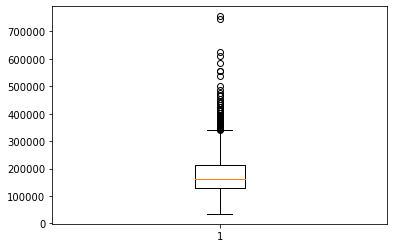

In [7]:
plt.boxplot(df_train['SalePrice'])

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
sum(df_train['SalePrice']>340000)  #total outliers

61

In [10]:
sum(df_train['SalePrice']<=340000) #removing outliers

1399

In [11]:
df_train=df_train[df_train['SalePrice']<=340000] #removed from df_train

In [12]:
df_train.drop('Id',axis=1,inplace=True)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1399 non-null   int64  
 1   MSZoning       1399 non-null   object 
 2   LotFrontage    1143 non-null   float64
 3   LotArea        1399 non-null   int64  
 4   Street         1399 non-null   object 
 5   Alley          1399 non-null   object 
 6   LotShape       1399 non-null   object 
 7   LandContour    1399 non-null   object 
 8   Utilities      1399 non-null   object 
 9   LotConfig      1399 non-null   object 
 10  LandSlope      1399 non-null   object 
 11  Neighborhood   1399 non-null   object 
 12  Condition1     1399 non-null   object 
 13  Condition2     1399 non-null   object 
 14  BldgType       1399 non-null   object 
 15  HouseStyle     1399 non-null   object 
 16  OverallQual    1399 non-null   int64  
 17  OverallCond    1399 non-null   int64  
 18  YearBuil

## Fill Empty/NA values

In [14]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(),inplace=True)

In [15]:
df_train['MasVnrType'].mode()[0]

'None'

In [16]:
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode(),inplace=True)

In [17]:
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean(),inplace=True)

In [18]:
df_train['Electrical'].mode()[0]

'SBrkr'

In [19]:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0],inplace=True)

In [20]:
df_train['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [21]:
df_train['GarageYrBlt'].value_counts()

2005.0    60
2004.0    51
2006.0    49
2003.0    45
2007.0    44
          ..
1900.0     1
1934.0     1
1908.0     1
1906.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [22]:
df_train['GarageYrBlt'].median()

1978.0

In [23]:
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)

#### Data preprosessing

In [24]:
df_train['MSZoning'].value_counts()

RL         1093
RM          216
FV           64
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [25]:
zoning=df_train['MSZoning'].value_counts().iloc[:3].index #selecting first 3 rows of high values

In [26]:
df_train['MSZoning'].apply(lambda z:z if z in zoning else 'MSZoning_Other')

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1399, dtype: object

In [27]:
df_train['MSZoning']=df_train['MSZoning'].apply(lambda z:z if z in zoning else 'MSZoning_Other')

In [28]:
df_train['MSZoning'].value_counts()

RL                1093
RM                 216
FV                  64
MSZoning_Other      26
Name: MSZoning, dtype: int64

### Feature_Encoding MSZoning

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
Ohe=OneHotEncoder(sparse=False)
Ohe.fit_transform(df_train[['MSZoning']])

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [31]:
MSZoning_enc=Ohe.fit_transform(df_train[['MSZoning']])

In [32]:
Ohe.categories_

[array(['FV', 'MSZoning_Other', 'RL', 'RM'], dtype=object)]

In [33]:
MSZoning_enc_df=pd.DataFrame(data=MSZoning_enc,columns=Ohe.categories_[0],dtype=int)

In [34]:
MSZoning_enc_df.head()

,FV,MSZoning_Other,RL,RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


### feature encoding of street

In [35]:
df_train['Street'].value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

In [36]:
Ohe1=OneHotEncoder(sparse=False)
Street_enc=Ohe1.fit_transform(df_train[['Street']])

In [37]:
Street_enc_df=pd.DataFrame(data=Street_enc,columns=Ohe1.categories_[0],dtype=int)
Street_enc_df.head()

,Grvl,Pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### feature encoding of alley

In [38]:
df_train['Alley'].value_counts()

NA      1308
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [39]:
Ohe2=OneHotEncoder(sparse=False)
Alley_enc=Ohe2.fit_transform(df_train[['Alley']])

In [40]:
Alley_enc_df=pd.DataFrame(data=Alley_enc,columns=Ohe2.categories_[0],dtype=int)
Alley_enc_df.head()

,Grvl,NA,Pave
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


### feature encoding of Lotshape , LandCounter and Utilities 

In [41]:
df_train['LotShape'].value_counts()

Reg    898
IR1    457
IR2     35
IR3      9
Name: LotShape, dtype: int64

In [42]:
df_train['LandContour'].value_counts()

Lvl    1261
Bnk      63
HLS      41
Low      34
Name: LandContour, dtype: int64

In [43]:
df_train['Utilities'].value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

In [44]:
Ohe3=OneHotEncoder(sparse=False)
multiple_enc=Ohe3.fit_transform(df_train[['LotShape','LandContour','Utilities']])

In [45]:
Ohe3.categories_

[array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object)]

In [46]:
LotLandUti_enc_df=pd.DataFrame(data=multiple_enc,dtype=int)

In [47]:
LotLandUti_enc_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,0,0,0,1,1,0
1,0,0,0,1,0,0,0,1,1,0
2,1,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,1,0


In [48]:
LotLandUti_enc_df.rename(columns={0:'IR1', 1:'IR2', 2:'IR3', 3:'Reg',4:'Bnk', 5:'HLS', 6:'Low', 7:'Lvl',8:'AllPub', 9:'NoSeWa'},inplace=True)

In [49]:
LotLandUti_enc_df.head()

,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,AllPub,NoSeWa
0,0,0,0,1,0,0,0,1,1,0
1,0,0,0,1,0,0,0,1,1,0
2,1,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,1,0


### Feature encoding LotConfig, Landslope,cond1,cond2

In [50]:
df_train['LotConfig'].value_counts()

Inside     1008
Corner      255
CulDSac      86
FR2          46
FR3           4
Name: LotConfig, dtype: int64

In [51]:
lotconfig=df_train['LotConfig'].value_counts().iloc[:2].index

In [52]:
df_train['LotConfig']=df_train['LotConfig'].apply(lambda l:l if l in lotconfig else 'LotConfig_Other')

In [53]:
df_train['LotConfig'].value_counts()

Inside             1008
Corner              255
LotConfig_Other     136
Name: LotConfig, dtype: int64

In [54]:
df_train['LandSlope'].value_counts()

Gtl    1326
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [55]:
df_train['Condition1'].value_counts()

Norm      1202
Feedr       81
Artery      47
RRAn        25
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [56]:
cond1=df_train['Condition1'].value_counts().iloc[:3].index

In [57]:
df_train['Condition1']=df_train['Condition1'].apply(lambda c:c if c in cond1 else 'Cond1_Other')

In [58]:
df_train['Condition1'].value_counts()

Norm           1202
Feedr            81
Cond1_Other      69
Artery           47
Name: Condition1, dtype: int64

In [59]:
df_train['Condition2'].value_counts()

Norm      1385
Feedr        6
RRNn         2
Artery       2
PosN         1
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [60]:
Cond2=df_train['Condition2'].value_counts().iloc[:1].index

In [61]:
df_train['Condition2']=df_train['Condition2'].apply(lambda c:c if c in Cond2 else 'Cond2_Other')

In [62]:
df_train['Condition2'].value_counts()

Norm           1385
Cond2_Other      14
Name: Condition2, dtype: int64

In [63]:
Ohe4=OneHotEncoder(sparse=False)
multiple_enc2=Ohe4.fit_transform(df_train[['LotConfig', 'LandSlope','Condition1','Condition2']])

In [64]:
LotLandCond12_enc_df=pd.DataFrame(data=multiple_enc2,dtype=int)

In [65]:
Ohe4.categories_

[array(['Corner', 'Inside', 'LotConfig_Other'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Artery', 'Cond1_Other', 'Feedr', 'Norm'], dtype=object),
 array(['Cond2_Other', 'Norm'], dtype=object)]

In [66]:
LotLandCond12_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,0,1,0,0,0,0,0,1,0,1
1,0,0,1,1,0,0,0,0,1,0,0,1
2,0,1,0,1,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,1,0,1
4,0,0,1,1,0,0,0,0,0,1,0,1


In [67]:
LotLandCond12_enc_df.rename(columns={0:'Corner', 1:'Inside', 2:'LotConfig_Other',3:'Gtl', 4:'Mod', 5:'Sev',6:'Artery', 7:'Feedr', 8:'Norm', 9:'Cond1_Other',10:'Norm', 11:'Cond2_Other'},inplace=True)

In [68]:
LotLandCond12_enc_df.head()

,Corner,Inside,LotConfig_Other,Gtl,Mod,Sev,Artery,Feedr,Norm,Cond1_Other,Norm,Cond2_Other
0,0,1,0,1,0,0,0,0,0,1,0,1
1,0,0,1,1,0,0,0,0,1,0,0,1
2,0,1,0,1,0,0,0,0,0,1,0,1
3,1,0,0,1,0,0,0,0,0,1,0,1
4,0,0,1,1,0,0,0,0,0,1,0,1


## Encoding of Neighborhood

In [69]:
df_train['Neighborhood'].value_counts()

NAmes      224
CollgCr    148
OldTown    112
Edwards    100
Somerst     84
Gilbert     78
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
NridgHt     50
Mitchel     49
Crawfor     48
IDOTRR      37
Timber      35
NoRidge     30
ClearCr     28
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
StoneBr     16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [70]:
ohe5=OneHotEncoder(sparse=False)
Neighborhood_enc=ohe5.fit_transform(df_train[['Neighborhood']])

In [71]:
Neighborhood_enc_df=pd.DataFrame(data=Neighborhood_enc,columns=ohe5.categories_[0],dtype=int)

In [72]:
Neighborhood_enc_df.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Encoding of BldgType HouseStyle

In [73]:
df_train['BldgType'].value_counts()

1Fam      1161
TwnhsE     112
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [74]:
bldtype=df_train['BldgType'].value_counts().iloc[:2].index

In [75]:
df_train['BldgType']=df_train['BldgType'].apply(lambda b:b if b in bldtype else 'BldgTpe_Other')

In [76]:
df_train['BldgType'].value_counts()

1Fam             1161
BldgTpe_Other     126
TwnhsE            112
Name: BldgType, dtype: int64

In [77]:
df_train['HouseStyle'].value_counts()

1Story    695
2Story    419
1.5Fin    152
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      7
Name: HouseStyle, dtype: int64

In [78]:
housestyle=df_train['HouseStyle'].value_counts().iloc[:3].index

In [79]:
df_train['HouseStyle']=df_train['HouseStyle'].apply(lambda h:h if h in housestyle else 'HouseStyle_Other')

In [80]:
df_train['HouseStyle'].value_counts()

1Story              695
2Story              419
1.5Fin              152
HouseStyle_Other    133
Name: HouseStyle, dtype: int64

In [81]:
ohe6=OneHotEncoder(sparse=False)
housestyle_enc=ohe6.fit_transform(df_train[['BldgType','HouseStyle']])

In [82]:
housestyle_enc_df=pd.DataFrame(data=housestyle_enc,dtype=int)

In [83]:
housestyle_enc_df.head()

,0,1,2,3,4,5,6
0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0
4,1,0,0,0,0,1,0


In [84]:
ohe6.categories_

[array(['1Fam', 'BldgTpe_Other', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1Story', '2Story', 'HouseStyle_Other'], dtype=object)]

In [85]:
housestyle_enc_df.rename(columns={0:'1Fam', 1:'BldgTpe_Other', 2:'TwnhsE',3:'1.5Fin', 4:'1Story', 5:'2Story', 6:'HouseStyle_Other'},inplace=True)

In [86]:
housestyle_enc_df.head()

,1Fam,BldgTpe_Other,TwnhsE,1.5Fin,1Story,2Story,HouseStyle_Other
0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0
4,1,0,0,0,0,1,0


### Encoding of Roofstyle and Roofmat

In [87]:
df_train['RoofStyle'].value_counts()

Gable      1119
Hip         247
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [88]:
roofstyle=df_train['RoofStyle'].value_counts().iloc[:2].index

In [89]:
df_train['RoofStyle']=df_train['RoofStyle'].apply(lambda r:r if r in roofstyle else 'RoofStyle_Other')

In [90]:
df_train['RoofStyle'].value_counts()

Gable              1119
Hip                 247
RoofStyle_Other      33
Name: RoofStyle, dtype: int64

In [91]:
df_train['RoofMatl'].value_counts()

CompShg    1376
Tar&Grv      11
WdShake       5
WdShngl       3
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [92]:
roofmat=df_train['RoofMatl'].value_counts().iloc[:1].index

In [93]:
df_train['RoofMatl']=df_train['RoofMatl'].apply(lambda r:r if r in roofmat else 'RoofMat_Other')

In [94]:
df_train['RoofMatl'].value_counts()

CompShg          1376
RoofMat_Other      23
Name: RoofMatl, dtype: int64

In [95]:
ohe7=OneHotEncoder(sparse=False)
roof_enc=ohe7.fit_transform(df_train[['RoofStyle','RoofMatl']])
roof_enc_df=pd.DataFrame(data=roof_enc,dtype=int)
roof_enc_df.head()

,0,1,2,3,4
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0


In [96]:
ohe7.categories_

[array(['Gable', 'Hip', 'RoofStyle_Other'], dtype=object),
 array(['CompShg', 'RoofMat_Other'], dtype=object)]

In [97]:
roof_enc_df.rename(columns={0:'Gable', 1:'Hip', 2:'RoofStyle_Other',3:'CompShg', 4:'RoofMat_Other'},inplace=True)

In [98]:
roof_enc_df.head()

,Gable,Hip,RoofStyle_Other,CompShg,RoofMat_Other
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0


## Encoding of Ext1st 2nd

In [99]:
df_train['Exterior1st'].value_counts()

VinylSd    479
HdBoard    220
MetalSd    217
Wd Sdng    203
Plywood    107
CemntBd     52
BrkFace     47
WdShing     24
Stucco      23
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [100]:
ext1st=df_train['Exterior1st'].value_counts().iloc[:5].index
df_train['Exterior1st']=df_train['Exterior1st'].apply(lambda e:e if e in ext1st else 'Ext1st_Other')
df_train['Exterior1st'].value_counts()

VinylSd         479
HdBoard         220
MetalSd         217
Wd Sdng         203
Ext1st_Other    173
Plywood         107
Name: Exterior1st, dtype: int64

In [101]:
df_train['Exterior2nd'].value_counts()

VinylSd    468
MetalSd    211
HdBoard    205
Wd Sdng    194
Plywood    142
CmentBd     51
Wd Shng     35
Stucco      25
BrkFace     23
AsbShng     20
ImStucc      8
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [102]:
ext2nd=df_train['Exterior2nd'].value_counts().iloc[:5].index
df_train['Exterior2nd']=df_train['Exterior2nd'].apply(lambda e:e if e in ext2nd else 'Ext2nd_Other')
df_train['Exterior2nd'].value_counts()

VinylSd         468
MetalSd         211
HdBoard         205
Wd Sdng         194
Ext2nd_Other    179
Plywood         142
Name: Exterior2nd, dtype: int64

In [103]:
df_train['MasVnrType'].value_counts()

None       854
BrkFace    418
Stone      105
BrkCmn      15
Name: MasVnrType, dtype: int64

In [104]:
msvnrtpe=df_train['MasVnrType'].value_counts().iloc[:1].index
df_train['MasVnrType']=df_train['MasVnrType'].apply(lambda m:m if m in msvnrtpe else 'MsVnrType_Other')
df_train['MasVnrType'].value_counts()

None               854
MsVnrType_Other    545
Name: MasVnrType, dtype: int64

In [105]:
ohe8=OneHotEncoder(sparse=False)
ext12_enc=ohe8.fit_transform(df_train[['Exterior1st','Exterior2nd','MasVnrType']])
ext12_enc_df=pd.DataFrame(data=ext12_enc,dtype=int)
ext12_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [106]:
ohe8.categories_

[array(['Ext1st_Other', 'HdBoard', 'MetalSd', 'Plywood', 'VinylSd',
        'Wd Sdng'], dtype=object),
 array(['Ext2nd_Other', 'HdBoard', 'MetalSd', 'Plywood', 'VinylSd',
        'Wd Sdng'], dtype=object),
 array(['MsVnrType_Other', 'None'], dtype=object)]

In [107]:
ext12_enc_df.rename(columns={0:'Ext1st_Other', 1:'HdBoard1',2:'MetalSd1', 3:'Plywood1', 4:'VinylSd1',
5:'Wd Sdng1',6:'Ext2nd_Other', 7:'HdBoard2', 8:'MetalSd2', 9:'Plywood2',10: 'VinylSd2',
11:'Wd Sdng2',12:'MsVnrType_Other',13:'Msvnr_None'},inplace=True)

In [108]:
ext12_enc_df.head()

,Ext1st_Other,HdBoard1,MetalSd1,Plywood1,VinylSd1,Wd Sdng1,Ext2nd_Other,HdBoard2,MetalSd2,Plywood2,VinylSd2,Wd Sdng2,MsVnrType_Other,Msvnr_None
0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,0,1,0


## Encoding of ExterQual,ExterCond,Foundation, BsmtQual,BsmtCond,BsmtExposure

In [109]:
df_train['ExterQual'].value_counts()

TA    902
Gd    459
Ex     24
Fa     14
Name: ExterQual, dtype: int64

In [110]:
df_train['ExterCond'].value_counts()

TA    1225
Gd     142
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [111]:
df_train['Foundation'].value_counts()

CBlock    629
PConc     592
BrkTil    145
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [112]:
foundation=df_train['Foundation'].value_counts().iloc[:3].index
df_train['Foundation']=df_train['Foundation'].apply(lambda f:f if f in foundation else 'Foundatio_Other')
df_train['Foundation'].value_counts()

CBlock             629
PConc              592
BrkTil             145
Foundatio_Other     33
Name: Foundation, dtype: int64

In [113]:
df_train['BsmtQual'].value_counts()

TA    647
Gd    604
Ex     76
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [114]:
df_train['BsmtCond'].value_counts()

TA    1254
Gd      61
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [115]:
df_train['BsmtExposure'].value_counts()

No    941
Av    205
Mn    108
Gd    107
NA     38
Name: BsmtExposure, dtype: int64

In [116]:
ohe9=OneHotEncoder(sparse=False)
extrbsmt_enc=ohe9.fit_transform(df_train[['ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']])
extrBsmt_enc_df=pd.DataFrame(data=extrbsmt_enc,dtype=int)
extrBsmt_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [117]:
ohe9.categories_

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['BrkTil', 'CBlock', 'Foundatio_Other', 'PConc'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'NA', 'TA'], dtype=object),
 array(['Fa', 'Gd', 'NA', 'Po', 'TA'], dtype=object),
 array(['Av', 'Gd', 'Mn', 'NA', 'No'], dtype=object)]

In [118]:
extrBsmt_enc_df.rename(columns={0:'Ex1', 1:'Fa1', 2:'Gd1', 3:'TA1',4:'Ex2', 5:'Fa2', 6:'Gd2',7:'Po2', 8:'TA2',9:'BrkTil', 10:'CBlock', 11:'Foundatio_Other', 12:'PConc',13:'Ex3', 14:'Fa3', 15:'Gd3',16:'NA3',17:'TA3',18:'Fa4', 19:'Gd4',20:'NA4',21:'Po4',22:'TA4',23:'Av5',24:'Gd5',25:'Mn5',26:'NA5',27:'No5'},inplace=True)

In [119]:
extrBsmt_enc_df.head()

,Ex1,Fa1,Gd1,TA1,Ex2,Fa2,Gd2,Po2,TA2,BrkTil,...,Fa4,Gd4,NA4,Po4,TA4,Av5,Gd5,Mn5,NA5,No5
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


## Encoding of BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical

In [120]:
df_train['BsmtFinType1'].value_counts()

Unf    419
GLQ    372
ALQ    218
BLQ    147
Rec    132
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [121]:
df_train['BsmtFinType2'].value_counts()

Unf    1198
Rec      52
LwQ      46
NA       38
BLQ      33
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64

In [122]:
fintype2=df_train['BsmtFinType2'].value_counts().iloc[:1].index
df_train['BsmtFinType2']=df_train['BsmtFinType2'].apply(lambda b:b if b in fintype2 else 'Fintype2_Other')
df_train['BsmtFinType2'].value_counts()

Unf               1198
Fintype2_Other     201
Name: BsmtFinType2, dtype: int64

In [123]:
df_train['Heating'].value_counts()

GasA     1368
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [124]:
heating=df_train['Heating'].value_counts().iloc[:1].index
df_train['Heating']=df_train['Heating'].apply(lambda h:h if h in heating else 'Heating_Other')
df_train['Heating'].value_counts()

GasA             1368
Heating_Other      31
Name: Heating, dtype: int64

In [125]:
df_train['HeatingQC'].value_counts()

Ex    685
TA    426
Gd    238
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [126]:
df_train['CentralAir'].value_counts()

Y    1304
N      95
Name: CentralAir, dtype: int64

In [127]:
df_train['Electrical'].value_counts()

SBrkr    1274
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [128]:
electrical=df_train['Electrical'].value_counts().iloc[:1].index
df_train['Electrical']=df_train['Electrical'].apply(lambda e:e if e in electrical else 'Electrical_Other')
df_train['Electrical'].value_counts()

SBrkr               1274
Electrical_Other     125
Name: Electrical, dtype: int64

In [129]:
ohe10=OneHotEncoder(sparse=False)
fintypeHeat_enc=ohe10.fit_transform(df_train[['BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical']])
fintypeHeat_enc_df=pd.DataFrame(data=fintypeHeat_enc,dtype=int)
fintypeHeat_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1


In [130]:
ohe10.categories_

[array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf'], dtype=object),
 array(['Fintype2_Other', 'Unf'], dtype=object),
 array(['GasA', 'Heating_Other'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Electrical_Other', 'SBrkr'], dtype=object)]

In [131]:
fintypeHeat_enc_df.rename(columns={0:'ALQ_fin1',1:'BLQ_fin1',2:'GLQ_fin1',3:'LwQ_fin1',4:'NA_fin1',5:'Rec_fin1',6:'Unf_fin1',7:'Fintype2_Other', 8:'Unf_fin2',9:'GasA', 10:'Heating_Other',11:'Ex_HQC', 12:'Fa_HQC', 13:'Gd_HQC', 14:'Po_HQC', 15:'TA_HQC',16:'N', 17:'Y', 18:'Electrical_Other', 19:'SBrkr' },inplace=True)

In [132]:
fintypeHeat_enc_df.head()

,ALQ_fin1,BLQ_fin1,GLQ_fin1,LwQ_fin1,NA_fin1,Rec_fin1,Unf_fin1,Fintype2_Other,Unf_fin2,GasA,Heating_Other,Ex_HQC,Fa_HQC,Gd_HQC,Po_HQC,TA_HQC,N,Y,Electrical_Other,SBrkr
0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1


## Encoding of KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond

In [133]:
df_train['KitchenQual'].value_counts()

TA    733
Gd    565
Ex     62
Fa     39
Name: KitchenQual, dtype: int64

In [134]:
df_train['Functional'].value_counts()

Typ     1300
Min2      34
Min1      31
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [135]:
functional=df_train['Functional'].value_counts().iloc[:1].index
df_train['Functional']=df_train['Functional'].apply(lambda f:f if f in functional else 'Functional_Other')
df_train['Functional'].value_counts()

Typ                 1300
Functional_Other      99
Name: Functional, dtype: int64

In [136]:
df_train['FireplaceQu'].value_counts()

NA    689
Gd    340
TA    303
Fa     33
Po     20
Ex     14
Name: FireplaceQu, dtype: int64

In [137]:
fireplace=df_train['FireplaceQu'].value_counts().iloc[:3].index
df_train['FireplaceQu']=df_train['FireplaceQu'].apply(lambda f:f if f in fireplace else 'Fireplace_Other')
df_train['FireplaceQu'].value_counts()

NA                 689
Gd                 340
TA                 303
Fireplace_Other     67
Name: FireplaceQu, dtype: int64

In [138]:
df_train['GarageType'].value_counts()

Attchd     826
Detchd     386
NA          81
BuiltIn     73
Basment     18
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [139]:
garage=df_train['GarageType'].value_counts().iloc[:2].index
df_train['GarageType']=df_train['GarageType'].apply(lambda g:g if g in garage else 'Garagetype_Other')
df_train['GarageType'].value_counts()

Attchd              826
Detchd              386
Garagetype_Other    187
Name: GarageType, dtype: int64

In [140]:
df_train['GarageFinish'].value_counts()

Unf    602
RFn    409
Fin    307
NA      81
Name: GarageFinish, dtype: int64

In [141]:
df_train['GarageQual'].value_counts()

TA    1251
NA      81
Fa      48
Gd      14
Po       3
Ex       2
Name: GarageQual, dtype: int64

In [142]:
garagequal=df_train['GarageQual'].value_counts().iloc[:1].index
df_train['GarageQual']=df_train['GarageQual'].apply(lambda g:g if g in garagequal else 'GarageQaul_Other')
df_train['GarageQual'].value_counts()

TA                  1251
GarageQaul_Other     148
Name: GarageQual, dtype: int64

In [143]:
df_train['GarageCond'].value_counts()

TA    1265
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [144]:
garagecond=df_train['GarageCond'].value_counts().iloc[:1].index
df_train['GarageCond']=df_train['GarageCond'].apply(lambda g:g if g in garagecond else 'GarageCond_Other')
df_train['GarageCond'].value_counts()

TA                  1265
GarageCond_Other     134
Name: GarageCond, dtype: int64

In [145]:
ohe11=OneHotEncoder(sparse=False)
kitchenGarage_enc=ohe11.fit_transform(df_train[['KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']])
kitchenGarage_enc_df=pd.DataFrame(data=kitchenGarage_enc,dtype=int)
kitchenGarage_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
4,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [146]:
ohe11.categories_

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Functional_Other', 'Typ'], dtype=object),
 array(['Fireplace_Other', 'Gd', 'NA', 'TA'], dtype=object),
 array(['Attchd', 'Detchd', 'Garagetype_Other'], dtype=object),
 array(['Fin', 'NA', 'RFn', 'Unf'], dtype=object),
 array(['GarageQaul_Other', 'TA'], dtype=object),
 array(['GarageCond_Other', 'TA'], dtype=object)]

In [147]:
kitchenGarage_enc_df.rename(columns={0:'Ex_K', 1:'Fa_K', 2:'Gd_K', 3:'TA_K',4:'Functional_Other', 5:'Functional_Typ',6:'Fireplace_Other', 7:'Gd_Fire', 8:'NA_Fire', 9:'TA_Fire',10:'Attchd',11:'Detchd', 12:'Garagetype_Other',13:'Fin_FireQu', 14:'NA_FireQu', 15:'RFn_FireQu',16:'Unf_FireQu',17:'GarageQaul_Other', 18:'TA_GarageQual',19:'GarageCond_Other',20:'TA_GarageCond'},inplace=True)
kitchenGarage_enc_df.head()

,Ex_K,Fa_K,Gd_K,TA_K,Functional_Other,Functional_Typ,Fireplace_Other,Gd_Fire,NA_Fire,TA_Fire,...,Detchd,Garagetype_Other,Fin_FireQu,NA_FireQu,RFn_FireQu,Unf_FireQu,GarageQaul_Other,TA_GarageQual,GarageCond_Other,TA_GarageCond
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
4,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


## Encoding of 'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'

In [148]:
df_train['PavedDrive'].value_counts()

Y    1279
N      90
P      30
Name: PavedDrive, dtype: int64

In [149]:
df_train['PoolQC'].value_counts()

NA    1393
Gd       3
Fa       2
Ex       1
Name: PoolQC, dtype: int64

In [150]:
pool=df_train['PoolQC'].value_counts().iloc[:1].index
df_train['PoolQC']=df_train['PoolQC'].apply(lambda p:p if p in pool else 'Pool_Other')
df_train['PoolQC'].value_counts()

NA            1393
Pool_Other       6
Name: PoolQC, dtype: int64

In [151]:
df_train['Fence'].value_counts()

NA       1122
MnPrv     155
GdPrv      58
GdWo       53
MnWw       11
Name: Fence, dtype: int64

In [152]:
fence=df_train['Fence'].value_counts().iloc[:1].index
df_train['Fence']=df_train['Fence'].apply(lambda f:f if f in fence else 'Fence_Other')
df_train['Fence'].value_counts()

NA             1122
Fence_Other     277
Name: Fence, dtype: int64

In [153]:
df_train['MiscFeature'].value_counts()

NA      1345
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [154]:
misc=df_train['MiscFeature'].value_counts().iloc[:1].index
df_train['MiscFeature']=df_train['MiscFeature'].apply(lambda m:m if m in misc else 'Misc_Other')
df_train['MiscFeature'].value_counts()

NA            1345
Misc_Other      54
Name: MiscFeature, dtype: int64

In [155]:
df_train['SaleType'].value_counts()

WD       1238
New        91
COD        43
ConLD       9
ConLw       5
CWD         4
ConLI       4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [156]:
saletype=df_train['SaleType'].value_counts().iloc[:1].index
df_train['SaleType']=df_train['SaleType'].apply(lambda s:s if s in saletype else 'SaleType_Other')
df_train['SaleType'].value_counts()

WD                1238
SaleType_Other     161
Name: SaleType, dtype: int64

In [157]:
df_train['SaleCondition'].value_counts()

Normal     1170
Abnorml     100
Partial      94
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [158]:
salecond=df_train['SaleCondition'].value_counts().iloc[:1].index
df_train['SaleCondition']=df_train['SaleCondition'].apply(lambda s:s if s in salecond else 'SaleCond_Other')
df_train['SaleCondition'].value_counts()

Normal            1170
SaleCond_Other     229
Name: SaleCondition, dtype: int64

In [159]:
ohe12=OneHotEncoder(sparse=False)
PoolSale_enc=ohe12.fit_transform(df_train[['PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']])
PoolSale_enc_df=pd.DataFrame(data=PoolSale_enc,dtype=int)
PoolSale_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,1,1,0,0,1,0,1,0,1,1,0
1,0,0,1,1,0,0,1,0,1,0,1,1,0
2,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0,0,1,1,0,0,1,0,1,0,1,0,1
4,0,0,1,1,0,0,1,0,1,0,1,1,0


In [160]:
ohe12.categories_

[array(['N', 'P', 'Y'], dtype=object),
 array(['NA', 'Pool_Other'], dtype=object),
 array(['Fence_Other', 'NA'], dtype=object),
 array(['Misc_Other', 'NA'], dtype=object),
 array(['SaleType_Other', 'WD'], dtype=object),
 array(['Normal', 'SaleCond_Other'], dtype=object)]

In [161]:
PoolSale_enc_df.rename(columns={0:'N_Paved', 1:'P_Paved',2:'Y_Paved',3:'NA_Pool', 4:'Pool_Other',5:'Fence_Other', 6:'NA_Fence',7:'Misc_Other', 8:'NA_Misc',9:'SaleType_Other', 10:'WD_SaleType',11:'Normal_SaleCond', 12:'SaleCond_Other'},inplace=True)
PoolSale_enc_df.head()

,N_Paved,P_Paved,Y_Paved,NA_Pool,Pool_Other,Fence_Other,NA_Fence,Misc_Other,NA_Misc,SaleType_Other,WD_SaleType,Normal_SaleCond,SaleCond_Other
0,0,0,1,1,0,0,1,0,1,0,1,1,0
1,0,0,1,1,0,0,1,0,1,0,1,1,0
2,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0,0,1,1,0,0,1,0,1,0,1,0,1
4,0,0,1,1,0,0,1,0,1,0,1,1,0


In [162]:
df_train['YearBuilt'].value_counts()

2005    58
2006    57
2004    52
2007    44
2003    40
        ..
1911     1
1882     1
1917     1
1913     1
1872     1
Name: YearBuilt, Length: 111, dtype: int64

In [163]:
df_train['YearRemodAdd'].value_counts()

1950    178
2006     85
2005     71
2007     70
2004     58
       ... 
1983      5
1986      5
1952      5
1951      4
2010      3
Name: YearRemodAdd, Length: 61, dtype: int64

In [164]:
X=df_train[['MSSubClass','LotArea','OverallQual', 'OverallCond','YearBuilt','YearRemodAdd',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF','2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
X=pd.concat([X.reset_index(),MSZoning_enc_df,Street_enc_df,Alley_enc_df,LotLandUti_enc_df,LotLandCond12_enc_df,
             Neighborhood_enc_df,housestyle_enc_df,roof_enc_df,ext12_enc_df,extrBsmt_enc_df,
             fintypeHeat_enc_df,kitchenGarage_enc_df,PoolSale_enc_df],axis=1)
y=df_train['SalePrice']

In [165]:
X.head()

,index,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,NA_Pool,Pool_Other,Fence_Other,NA_Fence,Misc_Other,NA_Misc,SaleType_Other,WD_SaleType,Normal_SaleCond,SaleCond_Other
0,0,60,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,1,0,1,0,1,1,0
1,1,20,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,1,0,1,0,1,1,0
2,2,60,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,1,0,1,0,1,1,0
3,3,70,9550,7,5,1915,1970,0.0,216,0,...,1,0,0,1,0,1,0,1,0,1
4,4,60,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,1,0,1,0,1,1,0


In [166]:
X.shape 

(1399, 199)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=11)

In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [169]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [170]:
model=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),n_estimators=450)
model.fit(X_train_scaled,y_train)
model.score(X_train_scaled,y_train),model.score(X_test_scaled,y_test)

(0.8762568452479441, 0.8132823552280336)

In [171]:
model=AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=3),n_estimators=450)
model.fit(X_train_scaled,y_train)
model.score(X_train_scaled,y_train),model.score(X_test_scaled,y_test)


(0.8695138163211417, 0.8224141244734445)

In [172]:
#Using RF
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=450,random_state=11)
model.fit(X_train_scaled,y_train)
model.score(X_train_scaled,y_train),model.score(X_test_scaled,y_test)

(0.9809841581482746, 0.8722659713620314)

# Testing Data

In [173]:
d2={'LotFrontage':['NA',''],'MasVnrArea':'NA','MasVnrType':'NA','Electrical':'NA','GarageYrBlt':'NA','Utilities':'NA','KitchenQual':'NA','Exterior1st':'NA','Exterior2nd':'NA','BsmtFinSF1':'NA',
   'BsmtFinSF2':'NA','BsmtUnfSF':'NA','TotalBsmtSF':'NA','BsmtFullBath':'NA','BsmtHalfBath':'NA','Functional':'NA','GarageCars':'NA','GarageArea':'NA','SaleType':'NA'} 
df_test=pd.read_csv('../../../Datasets/house-prices-advanced-regression-techniques/test.csv',keep_default_na=False,na_values=d2)

In [174]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

(array([  7.,  28.,  51., 119.,  67., 174., 241., 177., 131., 464.]),
 array([1879. , 1892.1, 1905.2, 1918.3, 1931.4, 1944.5, 1957.6, 1970.7,
        1983.8, 1996.9, 2010. ]),
 <BarContainer object of 10 artists>)

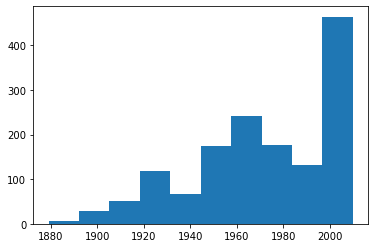

In [176]:
import matplotlib.pyplot as plt
plt.hist(df_test['YearBuilt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14ee5043f40>,
 'caps': [<matplotlib.lines.Line2D at 0x14ee504c640>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ee5043be0>],
 'medians': [<matplotlib.lines.Line2D at 0x14ee504cc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ee504cfa0>],
 'means': []}

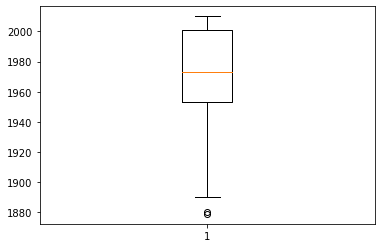

In [177]:
plt.boxplot(df_test['YearBuilt'])

In [178]:
sum(df_test['YearBuilt']<1890)

2

(array([305.,   0., 363.,   0.,   0., 318.,   0., 309.,   0., 164.]),
 array([2006. , 2006.4, 2006.8, 2007.2, 2007.6, 2008. , 2008.4, 2008.8,
        2009.2, 2009.6, 2010. ]),
 <BarContainer object of 10 artists>)

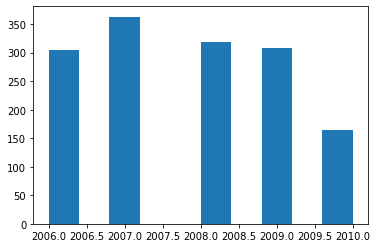

In [179]:
plt.hist(df_test['YrSold'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14ee3edc640>,
 'caps': [<matplotlib.lines.Line2D at 0x14ee3edcd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ee3edc340>],
 'medians': [<matplotlib.lines.Line2D at 0x14ee3eea400>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ee3eea760>],
 'means': []}

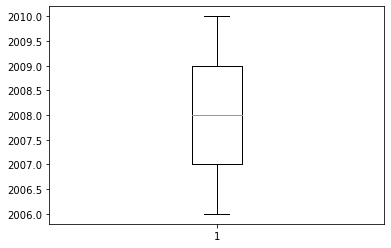

In [180]:
plt.boxplot(df_test['YrSold'])

(array([613., 151., 344.,  95.,  57.,  95.,   0.,   1.,  65.,  38.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <BarContainer object of 10 artists>)

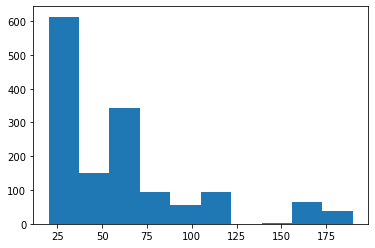

In [181]:
plt.hist(df_test['MSSubClass'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14ee70138b0>,
 'caps': [<matplotlib.lines.Line2D at 0x14ee7013f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ee7013550>],
 'medians': [<matplotlib.lines.Line2D at 0x14ee7023670>],
 'fliers': [<matplotlib.lines.Line2D at 0x14ee70239d0>],
 'means': []}

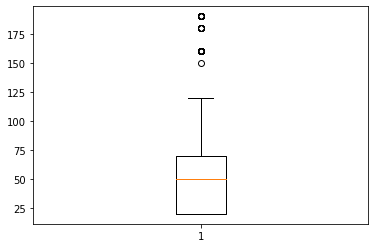

In [182]:
plt.boxplot(df_test['MSSubClass'])

In [183]:
sum(df_test['MSSubClass']>125)
#df_test=df_test[df_test['MSSubClass']<=125] #outliers removed from test

104

In [184]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Fill Missing Values

In [185]:
df_test['LotFrontage'].fillna(df_train['LotFrontage'].mean(),inplace=True)
df_test['Utilities'].fillna(df_train['Utilities'].mode()[0],inplace=True)
df_test['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0],inplace=True)
df_test['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0],inplace=True)
df_test['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0],inplace=True)
df_test['MasVnrArea'].fillna(df_train['MasVnrArea'].mean(),inplace=True)
df_test['BsmtFinSF1'].fillna(df_train['BsmtFinSF1'].mean(),inplace=True)
df_test['BsmtFinSF2'].fillna(df_train['BsmtFinSF2'].mean(),inplace=True)
df_test['BsmtUnfSF'].fillna(df_train['BsmtUnfSF'].mean(),inplace=True)
df_test['TotalBsmtSF'].fillna(df_train['TotalBsmtSF'].mean(),inplace=True)
df_test['BsmtFullBath'].fillna(df_train['BsmtFullBath'].mean(),inplace=True,)
df_test['BsmtHalfBath'].fillna(df_train['BsmtHalfBath'].mean(),inplace=True)
df_test['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0],inplace=True)
df_test['Functional'].fillna(df_train['Functional'].mode()[0],inplace=True)
df_test['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)
df_test['GarageCars'].fillna(df_train['GarageCars'].mean(),inplace=True)
df_test['GarageArea'].fillna(df_train['GarageArea'].mean(),inplace=True)
df_test['SaleType'].fillna(df_train['SaleType'].mode()[0],inplace=True)

In [186]:
df_train['BsmtFinSF1'].mode()[0]

0

In [187]:
df_test['BsmtFullBath'].value_counts()

0.000000    849
1.000000    584
2.000000     23
0.410293      2
3.000000      1
Name: BsmtFullBath, dtype: int64

In [188]:
df_test['BsmtHalfBath'].value_counts()

0.000000    1364
1.000000      91
0.058613       2
2.000000       2
Name: BsmtHalfBath, dtype: int64

In [189]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## DATA PreProcessing and Encoding

In [190]:
zoning=df_test['MSZoning'].value_counts().iloc[:3].index #selecting first 3 rows of high values
df_test['MSZoning']=df_test['MSZoning'].apply(lambda z:z if z in zoning else 'MSZoning_Other')
df_test['MSZoning'].value_counts()

RL                1114
RM                 242
FV                  74
MSZoning_Other      29
Name: MSZoning, dtype: int64

In [191]:
MSZoning_enc=Ohe.transform(df_test[['MSZoning']])
MSZoning_enc_df=pd.DataFrame(data=MSZoning_enc,columns=Ohe.categories_[0],dtype=int)
MSZoning_enc_df.head()

,FV,MSZoning_Other,RL,RM
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [192]:
Street_enc=Ohe1.transform(df_test[['Street']])
Street_enc_df=pd.DataFrame(data=Street_enc,columns=Ohe1.categories_[0],dtype=int)
Street_enc_df.head()

,Grvl,Pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [193]:
Alley_enc=Ohe2.transform(df_test[['Alley']])
Alley_enc_df=pd.DataFrame(data=Alley_enc,columns=Ohe2.categories_[0],dtype=int)
Alley_enc_df.head()

,Grvl,NA,Pave
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [194]:
multiple_enc=Ohe3.transform(df_test[['LotShape','LandContour','Utilities']])
LotLandUti_enc_df=pd.DataFrame(data=multiple_enc,dtype=int)
LotLandUti_enc_df.rename(columns={0:'IR1', 1:'IR2', 2:'IR3', 3:'Reg',4:'Bnk', 5:'HLS', 6:'Low', 7:'Lvl',8:'AllPub', 9:'NoSeWa'},inplace=True)
LotLandUti_enc_df.head()

,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,AllPub,NoSeWa
0,0,0,0,1,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,1,0,0,1,0


In [195]:
lotconfig=df_test['LotConfig'].value_counts().iloc[:2].index
df_test['LotConfig']=df_test['LotConfig'].apply(lambda l:l if l in lotconfig else 'LotConfig_Other')
df_test['LotConfig'].value_counts()

Inside             1081
Corner              248
LotConfig_Other     130
Name: LotConfig, dtype: int64

In [196]:
cond1=df_test['Condition1'].value_counts().iloc[:3].index
df_test['Condition1']=df_test['Condition1'].apply(lambda c:c if c in cond1 else 'Cond1_Other')
df_test['Condition1'].value_counts()

Norm           1251
Feedr            83
Cond1_Other      81
Artery           44
Name: Condition1, dtype: int64

In [197]:
Cond2=df_train['Condition2'].value_counts().iloc[:1].index
df_test['Condition2']=df_test['Condition2'].apply(lambda c:c if c in Cond2 else 'Cond2_Other')
df_test['Condition2'].value_counts()

Norm           1444
Cond2_Other      15
Name: Condition2, dtype: int64

In [198]:
multiple_enc2=Ohe4.transform(df_test[['LotConfig', 'LandSlope','Condition1','Condition2']])
LotLandCond12_enc_df=pd.DataFrame(data=multiple_enc2,dtype=int)
LotLandCond12_enc_df.rename(columns={0:'Corner', 1:'Inside', 2:'LotConfig_Other',3:'Gtl', 4:'Mod', 5:'Sev',6:'Artery', 7:'Feedr', 8:'Norm', 9:'Cond1_Other',10:'Norm', 11:'Cond2_Other'},inplace=True)
LotLandCond12_enc_df.head()

,Corner,Inside,LotConfig_Other,Gtl,Mod,Sev,Artery,Feedr,Norm,Cond1_Other,Norm,Cond2_Other
0,0,1,0,1,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,0,0,0,1,0,1
2,0,1,0,1,0,0,0,0,0,1,0,1
3,0,1,0,1,0,0,0,0,0,1,0,1
4,0,1,0,1,0,0,0,0,0,1,0,1


In [199]:
Neighborhood_enc=ohe5.transform(df_test[['Neighborhood']])
Neighborhood_enc_df=pd.DataFrame(data=Neighborhood_enc,columns=ohe5.categories_[0],dtype=int)
Neighborhood_enc_df.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [200]:
bldtype=df_test['BldgType'].value_counts().iloc[:2].index
df_test['BldgType']=df_test['BldgType'].apply(lambda b:b if b in bldtype else 'BldgTpe_Other')
housestyle=df_test['HouseStyle'].value_counts().iloc[:3].index
df_test['HouseStyle']=df_test['HouseStyle'].apply(lambda h:h if h in housestyle else 'HouseStyle_Other')

In [201]:
housestyle_enc=ohe6.transform(df_test[['BldgType','HouseStyle']])
housestyle_enc_df=pd.DataFrame(data=housestyle_enc,dtype=int)
housestyle_enc_df.rename(columns={0:'1Fam', 1:'BldgTpe_Other', 2:'TwnhsE',3:'1.5Fin', 4:'1Story', 5:'2Story', 6:'HouseStyle_Other'},inplace=True)
housestyle_enc_df.head()

,1Fam,BldgTpe_Other,TwnhsE,1.5Fin,1Story,2Story,HouseStyle_Other
0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,1,0,0


In [202]:
roofstyle=df_test['RoofStyle'].value_counts().iloc[:2].index
df_test['RoofStyle']=df_test['RoofStyle'].apply(lambda r:r if r in roofstyle else 'RoofStyle_Other')
roofmat=df_test['RoofMatl'].value_counts().iloc[:1].index
df_test['RoofMatl']=df_test['RoofMatl'].apply(lambda r:r if r in roofmat else 'RoofMat_Other')

In [203]:
roof_enc=ohe7.transform(df_test[['RoofStyle','RoofMatl']])
roof_enc_df=pd.DataFrame(data=roof_enc,dtype=int)
roof_enc_df.rename(columns={0:'Gable', 1:'Hip', 2:'RoofStyle_Other',3:'CompShg', 4:'RoofMat_Other'},inplace=True)
roof_enc_df.head()

,Gable,Hip,RoofStyle_Other,CompShg,RoofMat_Other
0,1,0,0,1,0
1,0,1,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0


In [204]:
ext1st=df_test['Exterior1st'].value_counts().iloc[:5].index
df_test['Exterior1st']=df_test['Exterior1st'].apply(lambda e:e if e in ext1st else 'Ext1st_Other')
ext2nd=df_test['Exterior2nd'].value_counts().iloc[:5].index
df_test['Exterior2nd']=df_test['Exterior2nd'].apply(lambda e:e if e in ext2nd else 'Ext2nd_Other')
msvnrtpe=df_test['MasVnrType'].value_counts().iloc[:1].index
df_test['MasVnrType']=df_test['MasVnrType'].apply(lambda m:m if m in msvnrtpe else 'MsVnrType_Other')

In [205]:
ext12_enc=ohe8.transform(df_test[['Exterior1st','Exterior2nd','MasVnrType']])
ext12_enc_df=pd.DataFrame(data=ext12_enc,dtype=int)
ext12_enc_df.rename(columns={0:'Ext1st_Other', 1:'HdBoard1',2:'MetalSd1', 3:'Plywood1', 4:'VinylSd1',
5:'Wd Sdng1',6:'Ext2nd_Other', 7:'HdBoard2', 8:'MetalSd2', 9:'Plywood2',10: 'VinylSd2',
11:'Wd Sdng2',12:'MsVnrType_Other',13:'Msvnr_None'},inplace=True)
ext12_enc_df.head()

,Ext1st_Other,HdBoard1,MetalSd1,Plywood1,VinylSd1,Wd Sdng1,Ext2nd_Other,HdBoard2,MetalSd2,Plywood2,VinylSd2,Wd Sdng2,MsVnrType_Other,Msvnr_None
0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [206]:
foundation=df_test['Foundation'].value_counts().iloc[:3].index
df_test['Foundation']=df_test['Foundation'].apply(lambda f:f if f in foundation else 'Foundatio_Other')


In [207]:
extrbsmt_enc=ohe9.transform(df_test[['ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']])
extrBsmt_enc_df=pd.DataFrame(data=extrbsmt_enc,dtype=int)
extrBsmt_enc_df.rename(columns={0:'Ex1', 1:'Fa1', 2:'Gd1', 3:'TA1',4:'Ex2', 5:'Fa2', 6:'Gd2',7:'Po2', 8:'TA2',9:'BrkTil', 10:'CBlock', 11:'Foundatio_Other', 12:'PConc',13:'Ex3', 14:'Fa3', 15:'Gd3',16:'NA3',17:'TA3',18:'Fa4', 19:'Gd4',20:'NA4',21:'Po4',22:'TA4',23:'Av5',24:'Gd5',25:'Mn5',26:'NA5',27:'No5'},inplace=True)
extrBsmt_enc_df.head()

,Ex1,Fa1,Gd1,TA1,Ex2,Fa2,Gd2,Po2,TA2,BrkTil,...,Fa4,Gd4,NA4,Po4,TA4,Av5,Gd5,Mn5,NA5,No5
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [208]:
fintype2=df_test['BsmtFinType2'].value_counts().iloc[:1].index
df_test['BsmtFinType2']=df_test['BsmtFinType2'].apply(lambda b:b if b in fintype2 else 'Fintype2_Other')
heating=df_test['Heating'].value_counts().iloc[:1].index
df_test['Heating']=df_test['Heating'].apply(lambda h:h if h in heating else 'Heating_Other')
electrical=df_test['Electrical'].value_counts().iloc[:1].index
df_test['Electrical']=df_test['Electrical'].apply(lambda e:e if e in electrical else 'Electrical_Other')


In [209]:
fintypeHeat_enc=ohe10.transform(df_test[['BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical']])
fintypeHeat_enc_df=pd.DataFrame(data=fintypeHeat_enc,dtype=int)
fintypeHeat_enc_df.rename(columns={0:'ALQ_fin1',1:'BLQ_fin1',2:'GLQ_fin1',3:'LwQ_fin1',4:'NA_fin1',5:'Rec_fin1',6:'Unf_fin1',7:'Fintype2_Other', 8:'Unf_fin2',9:'GasA', 10:'Heating_Other',11:'Ex_HQC', 12:'Fa_HQC', 13:'Gd_HQC', 14:'Po_HQC', 15:'TA_HQC',16:'N', 17:'Y', 18:'Electrical_Other', 19:'SBrkr' },inplace=True)
fintypeHeat_enc_df.head()

,ALQ_fin1,BLQ_fin1,GLQ_fin1,LwQ_fin1,NA_fin1,Rec_fin1,Unf_fin1,Fintype2_Other,Unf_fin2,GasA,Heating_Other,Ex_HQC,Fa_HQC,Gd_HQC,Po_HQC,TA_HQC,N,Y,Electrical_Other,SBrkr
0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1
2,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1


In [210]:
functional=df_test['Functional'].value_counts().iloc[:1].index
df_test['Functional']=df_test['Functional'].apply(lambda f:f if f in functional else 'Functional_Other')
fireplace=df_test['FireplaceQu'].value_counts().iloc[:3].index
df_test['FireplaceQu']=df_test['FireplaceQu'].apply(lambda f:f if f in fireplace else 'Fireplace_Other')
garage=df_test['GarageType'].value_counts().iloc[:2].index
df_test['GarageType']=df_test['GarageType'].apply(lambda g:g if g in garage else 'Garagetype_Other')
garagequal=df_test['GarageQual'].value_counts().iloc[:1].index
df_test['GarageQual']=df_test['GarageQual'].apply(lambda g:g if g in garagequal else 'GarageQaul_Other')
garagecond=df_test['GarageCond'].value_counts().iloc[:1].index
df_test['GarageCond']=df_test['GarageCond'].apply(lambda g:g if g in garagecond else 'GarageCond_Other')

In [211]:
kitchenGarage_enc=ohe11.transform(df_test[['KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']])
kitchenGarage_enc_df=pd.DataFrame(data=kitchenGarage_enc,dtype=int)
kitchenGarage_enc_df.rename(columns={0:'Ex_K', 1:'Fa_K', 2:'Gd_K', 3:'TA_K',4:'Functional_Other', 5:'Functional_Typ',6:'Fireplace_Other', 7:'Gd_Fire', 8:'NA_Fire', 9:'TA_Fire',10:'Attchd',11:'Detchd', 12:'Garagetype_Other',13:'Fin_FireQu', 14:'NA_FireQu', 15:'RFn_FireQu',16:'Unf_FireQu',17:'GarageQaul_Other', 18:'TA_GarageQual',19:'GarageCond_Other',20:'TA_GarageCond'},inplace=True)
kitchenGarage_enc_df.head()

,Ex_K,Fa_K,Gd_K,TA_K,Functional_Other,Functional_Typ,Fireplace_Other,Gd_Fire,NA_Fire,TA_Fire,...,Detchd,Garagetype_Other,Fin_FireQu,NA_FireQu,RFn_FireQu,Unf_FireQu,GarageQaul_Other,TA_GarageQual,GarageCond_Other,TA_GarageCond
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
3,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [212]:
pool=df_test['PoolQC'].value_counts().iloc[:1].index
df_test['PoolQC']=df_test['PoolQC'].apply(lambda p:p if p in pool else 'Pool_Other')
fence=df_test['Fence'].value_counts().iloc[:1].index
df_test['Fence']=df_test['Fence'].apply(lambda f:f if f in fence else 'Fence_Other')
misc=df_test['MiscFeature'].value_counts().iloc[:1].index
df_test['MiscFeature']=df_test['MiscFeature'].apply(lambda m:m if m in misc else 'Misc_Other')
saletype=df_test['SaleType'].value_counts().iloc[:1].index
df_test['SaleType']=df_test['SaleType'].apply(lambda s:s if s in saletype else 'SaleType_Other')
salecond=df_test['SaleCondition'].value_counts().iloc[:1].index
df_test['SaleCondition']=df_test['SaleCondition'].apply(lambda s:s if s in salecond else 'SaleCond_Other')

In [213]:
df_test['SaleType'].value_counts()

WD                1259
SaleType_Other     200
Name: SaleType, dtype: int64

In [214]:
PoolSale_enc=ohe12.transform(df_test[['PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']])
PoolSale_enc_df=pd.DataFrame(data=PoolSale_enc,dtype=int)
PoolSale_enc_df.rename(columns={0:'N_Paved', 1:'P_Paved',2:'Y_Paved',3:'NA_Pool', 4:'Pool_Other',5:'Fence_Other', 6:'NA_Fence',7:'Misc_Other', 8:'NA_Misc',9:'SaleType_Other', 10:'WD_SaleType',11:'Normal_SaleCond', 12:'SaleCond_Other'},inplace=True)
PoolSale_enc_df.head()

,N_Paved,P_Paved,Y_Paved,NA_Pool,Pool_Other,Fence_Other,NA_Fence,Misc_Other,NA_Misc,SaleType_Other,WD_SaleType,Normal_SaleCond,SaleCond_Other
0,0,0,1,1,0,1,0,0,1,0,1,1,0
1,0,0,1,1,0,0,1,1,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,0,1,1,0
3,0,0,1,1,0,0,1,0,1,0,1,1,0
4,0,0,1,1,0,0,1,0,1,0,1,1,0


In [215]:
A=df_test[['MSSubClass','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
A=pd.concat([A.reset_index(),MSZoning_enc_df,Street_enc_df,Alley_enc_df,LotLandUti_enc_df,LotLandCond12_enc_df,
             Neighborhood_enc_df,housestyle_enc_df,roof_enc_df,ext12_enc_df,extrBsmt_enc_df,
             fintypeHeat_enc_df,kitchenGarage_enc_df,PoolSale_enc_df],axis=1)

In [216]:
A.shape

(1459, 199)

In [217]:
A.head()

,index,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,NA_Pool,Pool_Other,Fence_Other,NA_Fence,Misc_Other,NA_Misc,SaleType_Other,WD_SaleType,Normal_SaleCond,SaleCond_Other
0,0,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,0,1,0,0,1,0,1,1,0
1,1,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,0,0,1,1,0,0,1,1,0
2,2,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,0,1,0,0,1,0,1,1,0
3,3,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,0,0,1,0,1,0,1,1,0
4,4,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,0,0,1,0,1,0,1,1,0


In [218]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 199 entries, index to SaleCond_Other
dtypes: float64(9), int32(164), int64(26)
memory usage: 1.3 MB


In [219]:
yp=model.predict(A)

In [220]:
df_test['SalePrice']=yp

In [221]:
df_test[['Id','SalePrice']].to_csv('HouseSub1.csv', index=False)

In [222]:
#s1=set(X.columns)

In [223]:
#s2=set(A.columns)

In [224]:
#s1.difference(s2)

In [225]:
#A['NoSeWa']=0

In [226]:
#model.predict(A)